<a href="https://colab.research.google.com/github/daniela2001-png/actividad_3_IA/blob/main/Regresi%C3%B3n_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports the necessary libraries: pandas, matplotlib.pyplot, train_test_split from sklearn.model_selection, and LinearRegression from sklearn.linear_model
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [ ]:
# Reads a CSV file ('Salary_dataset.csv') into a pandas DataFrame.
df = pd.read_csv('https://raw.githubusercontent.com/daniela2001-png/actividad_3_IA/main/Salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


# Sección nueva

In [ ]:
# Checks the quality of the data by printing whether there are any missing values, the data types of each column, and a summary of the DataFrame.
print(df.isnull().values.any())
print(df.dtypes)
print(df.info())

False
Unnamed: 0           int64
YearsExperience    float64
Salary             float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes
None


In [ ]:
# Drops a column ('Unnamed: 0') that is not relevant for the training.
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
# Prints the column names of the DataFrame and assigns the 'YearsExperience' column to variable x and the 'Salary' column to variable y.
print(df.columns)
x = df.YearsExperience
y = df.Salary

Index(['YearsExperience', 'Salary'], dtype='object')


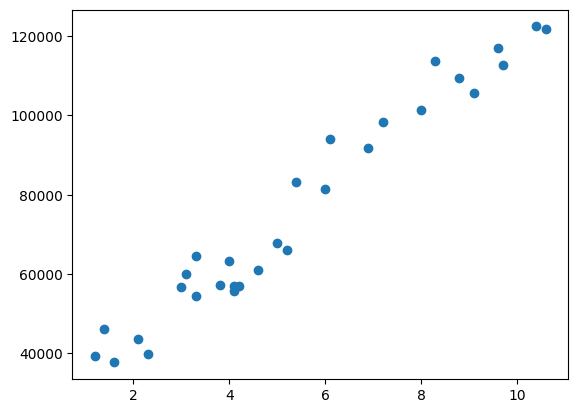

In [ ]:
# Creates a scatter plot to visualize the correlation between 'YearsExperience' and 'Salary'.
fig, ax = plt.subplots()
ax.scatter(x, y)
plt.show()

In [ ]:
# Calculates the Pearson correlation coefficient between all pairs of columns in the DataFrame df.
corr_pearson = df.corr(method='pearson')
print(corr_pearson)

                 YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000


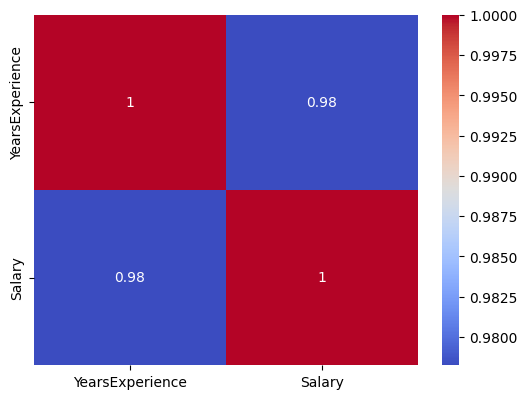

In [ ]:
# Obtain the correlation matrix
corr_matrix = df.corr()

# We Create a heat map using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Adjust the margins to prevent the heat map from being cropped
plt.subplots_adjust(left=0.15, bottom=0.15)

# Display the heat map
plt.show()

In [ ]:
# Converts the 'YearsExperience' column to a DataFrame called X.
X = x.to_frame()
print(X)

    YearsExperience
0               1.2
1               1.4
2               1.6
3               2.1
4               2.3
5               3.0
6               3.1
7               3.3
8               3.3
9               3.8
10              4.0
11              4.1
12              4.1
13              4.2
14              4.6
15              5.0
16              5.2
17              5.4
18              6.0
19              6.1
20              6.9
21              7.2
22              8.0
23              8.3
24              8.8
25              9.1
26              9.6
27              9.7
28             10.4
29             10.6


In [ ]:
# Splits the data into training and test sets using train_test_split, with 23% of the data allocated for testing and a random state of 50, The random_state parameter in the split function is used to control the randomness in the splitting of the data.
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.23,
                                                    random_state=50)
print(x_train)

    YearsExperience
20              6.9
29             10.6
21              7.2
10              4.0
27              9.7
12              4.1
3               2.1
14              4.6
24              8.8
15              5.0
7               3.3
2               1.6
22              8.0
26              9.6
23              8.3
5               3.0
6               3.1
4               2.3
1               1.4
13              4.2
11              4.1
0               1.2
16              5.2


In [ ]:
# Creates an instance of the LinearRegression model and fits it to the training data.
# linear regression allows understanding and predicting relationships between variables, which makes it useful in decision making, understanding trends and predicting outcomes in various fields.
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Predicts the salary for the test set.
y_pred = regressor.predict(x_test)

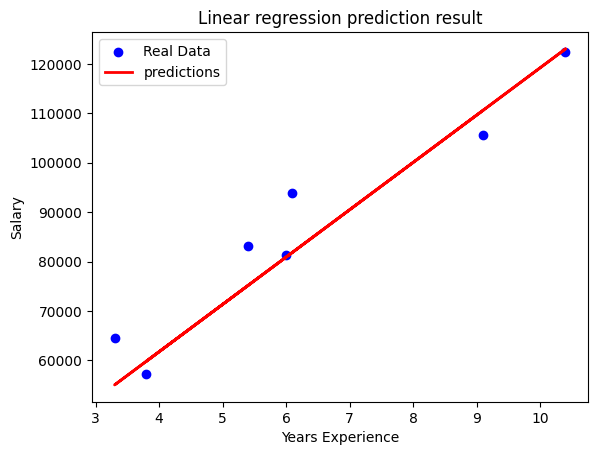

In [ ]:
# Graficar los datos reales
plt.scatter(x_test, y_test, color='blue', label='Real Data')

# Graficar las predicciones
plt.plot(x_test, y_pred, color='red', linewidth=2, label='predictions')

# Etiquetas y título
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.title('Linear regression prediction result')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

In [ ]:
#calculate the accuracy of the model
r2_score = regressor.score(x_test,y_test)
print(r2_score*100)

89.33079582303989


El análisis de regresión lineal realizado entre los años de experiencia y el salario de los trabajadores, muestra que existe una relación positiva y significativa entre estas dos variables. Esto significa que, a mayor experiencia, mayor es el salario. El coeficiente de correlación de Pearson, que mide la fuerza de la relación entre dos variables, indica una correlación alta, lo que significa que existe una relación lineal fuerte entre las variables. Por otro lado, el gráfico de dispersión, muestra que los datos están distribuidos de manera lineal, lo que confirma la relación positiva entre las variables. La matriz de correlación también muestra que las variables están correlacionadas positivamente.

Interpretando los resultados, se puede ver que el análisis indican que la experiencia es un factor importante que determina el salario de los trabajadores. Los trabajadores con mayor experiencia tienden a tener salarios más altos que los trabajadores con menor experiencia. Esta relación se puede explicar por varios factores. Por un lado, los trabajadores con mayor experiencia tienen más conocimientos y habilidades, lo que los hace más productivos. Por otro lado, los trabajadores con mayor experiencia suelen ocupar puestos de mayor responsabilidad, que tienen salarios más altos.


Por último  el score del modelo de regresión  es igual a un 89.33% lo cual nos indica que el modelo tuve un porcentaje de predicción  alto

The linear regression analysis conducted between years of experience and worker salaries shows that there is a positive and significant relationship between these two variables. This means that as experience increases, so does the salary. The Pearson correlation coefficient, which measures the strength of the relationship between two variables, indicates a high correlation, suggesting a strong linear relationship between the variables. Additionally, the scatter plot shows that the data is linearly distributed, confirming the positive relationship between the variables. The correlation matrix also indicates positive correlations between the variables.

Interpreting the results, it can be seen that the analysis indicates that experience is an important factor in determining worker salaries. Workers with more experience tend to have higher salaries compared to those with less experience. This relationship can be explained by several factors. On one hand, workers with more experience have more knowledge and skills, making them more productive. On the other hand, workers with more experience often hold positions of higher responsibility, which typically come with higher salaries.

Lastly, the regression model's score is 89.33%, indicating a high prediction percentage for the model.


